#### Dataset

In [2]:
# mnist handwritten digits

#### Import the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.utils import to_categorical

#### Load the dataset

In [8]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

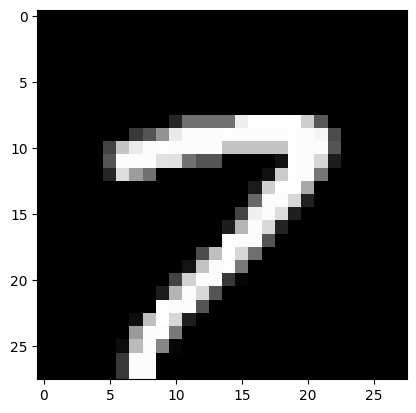

In [13]:
plt.imshow(x_train[123], cmap = 'gray')

In [14]:
y_train[123]

7

In [15]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [17]:
x = np.array([[4,5],[7,8]])

In [18]:
x

array([[4, 5],
       [7, 8]])

In [19]:
x.flatten()

array([4, 5, 7, 8])

#### Flatten the data

In [26]:
pixels = x_train.shape[1] * x_train.shape[2]

In [27]:
pixels

784

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
x_train = x_train.reshape(-1, pixels)
x_train.shape

(60000, 784)

In [30]:
x_test = x_test.reshape(-1, pixels)
x_test.shape

(10000, 784)

#### Output variable encoding

In [32]:
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [33]:
y_train_new.shape

(60000, 10)

In [34]:
y_train_new

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#### Build the model

In [36]:
model = Sequential()

# input layer
model.add(Dense(784, input_shape=(784,), activation='relu'))

# Hidden Layer-1
model.add(Dense(512, activation='relu'))

# Hiden Layer-2
model.add(Dense(256, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))

#### Compile the model

In [46]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Train the model

In [47]:
x_train.shape, y_train_new.shape

((60000, 784), (60000, 10))

In [48]:
model.fit(x_train, y_train_new, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 [==============================] - 61s 10ms/step - loss: 0.7609 - accuracy: 0.9025
Epoch 2/10
6000/6000 [==============================] - 60s 10ms/step - loss: 0.2485 - accuracy: 0.9402
Epoch 3/10
6000/6000 [==============================] - 61s 10ms/step - loss: 0.1960 - accuracy: 0.9553
Epoch 4/10
6000/6000 [==============================] - 61s 10ms/step - loss: 0.1739 - accuracy: 0.9631
Epoch 5/10
6000/6000 [==============================] - 62s 10ms/step - loss: 0.1660 - accuracy: 0.9657
Epoch 6/10
6000/6000 [==============================] - 63s 10ms/step - loss: 0.1705 - accuracy: 0.9660
Epoch 7/10
6000/6000 [==============================] - 63s 11ms/step - loss: 0.1991 - accuracy: 0.9629
Epoch 8/10
6000/6000 [==============================] - 63s 11ms/step - loss: 0.1663 - accuracy: 0.9666
Epoch 9/10
6000/6000 [==============================] - 63s 11ms/step - loss: 0.1767 - accuracy: 0.9663
Epoch 10/10
6000/6000 [==============================] - 63s 11m

#### Evaluate on test dataset

In [50]:
model.evaluate(x_test, y_test_new, batch_size=1)

10000/10000 [==============================] - 15s 1ms/step - loss: 0.3428 - accuracy: 0.9550


[0.3428388237953186, 0.9549999833106995]